In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE


In [8]:
df = pd.read_csv(r"C:\Users\Samta sakha\OneDrive\Desktop\Corizo project\signal-data.csv")
print("Shape:", df.shape)
df.head()



Shape: (1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


Cleaned shape: (1393, 539)
After SMOTE: (2588, 538) Pass/Fail
-1    1294
 1    1294
Name: count, dtype: int64

Model: Random Forest
[[258   4]
 [  0 256]]
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       262
           1       0.98      1.00      0.99       256

    accuracy                           0.99       518
   macro avg       0.99      0.99      0.99       518
weighted avg       0.99      0.99      0.99       518


Model: SVM
[[258   4]
 [  1 255]]
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       262
           1       0.98      1.00      0.99       256

    accuracy                           0.99       518
   macro avg       0.99      0.99      0.99       518
weighted avg       0.99      0.99      0.99       518


Model: Naive Bayes
[[ 42 220]
 [  1 255]]
              precision    recall  f1-score   support

          -1       0.98      0.16      0.28       262
    

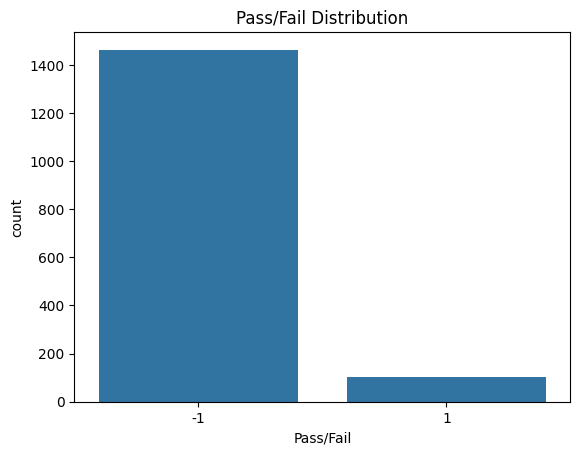

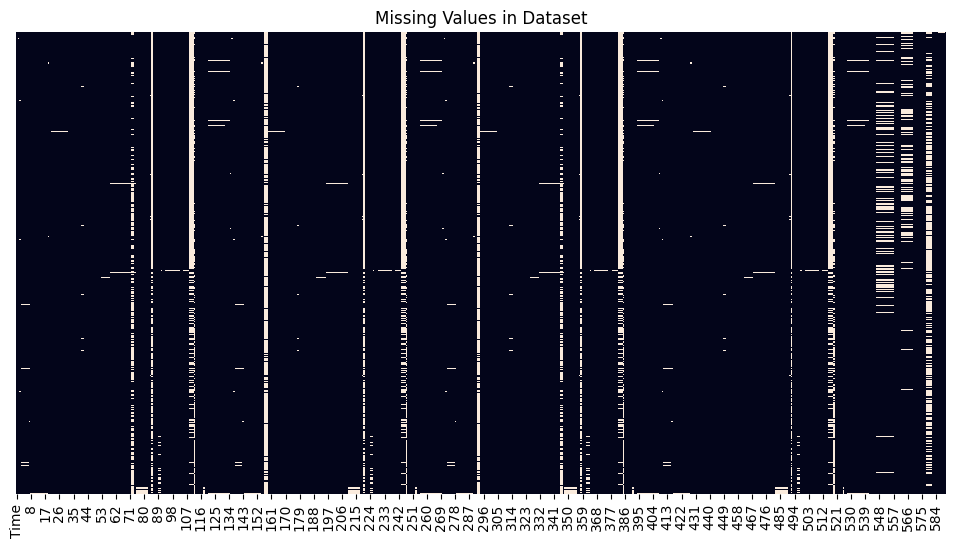

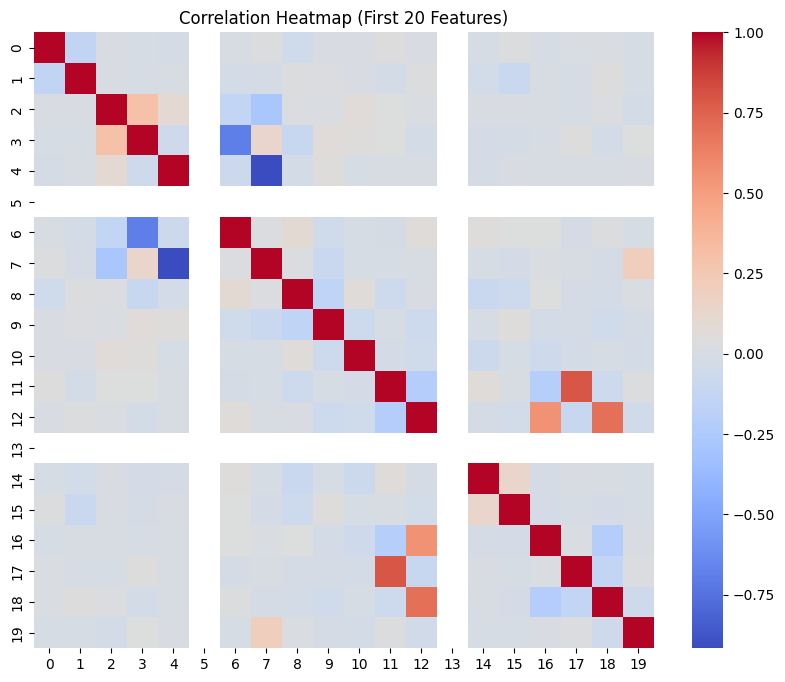

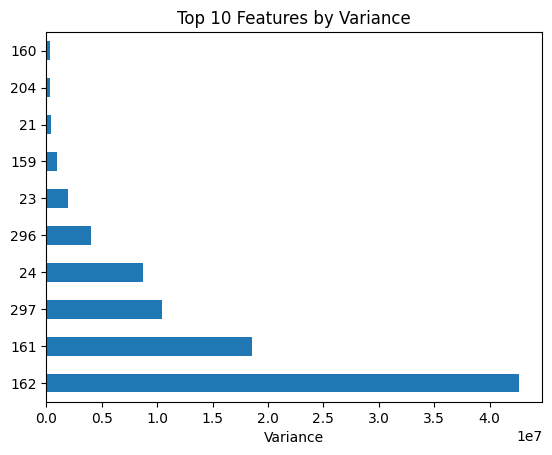

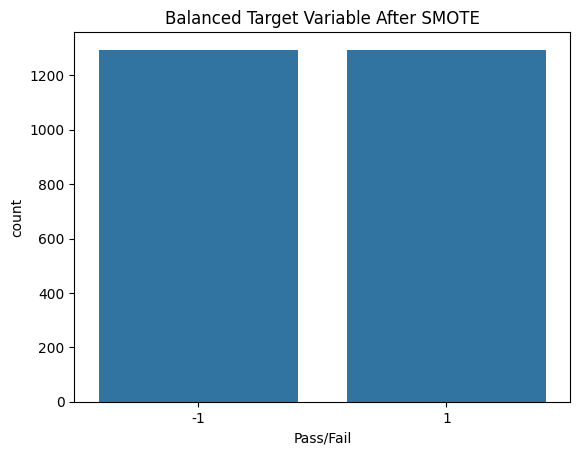

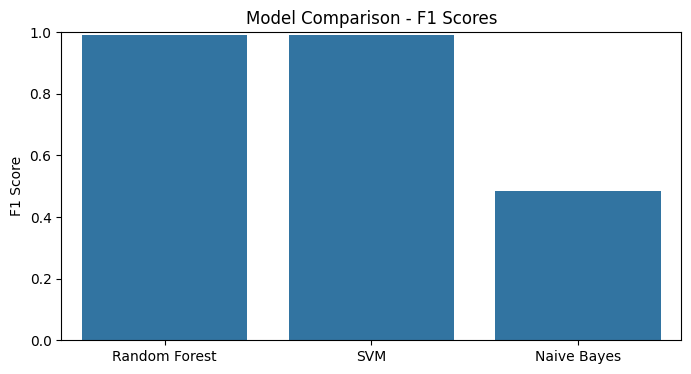

RandomForestClassifier(random_state=42)

In [18]:
df_clean = df.drop(columns=["Time"])
df_clean = df_clean.dropna(axis=1, thresh=int(0.95 * len(df_clean)))

df_clean = df_clean.dropna()
print("Cleaned shape:", df_clean.shape)
X = df_clean.drop(columns=["Pass/Fail"])
y = df_clean["Pass/Fail"]
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

print("After SMOTE:", X_bal.shape, y_bal.value_counts())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_bal, test_size=0.2, random_state=42
)
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    results[name] = classification_report(y_test, y_pred, output_dict=True)

print("F1-Scores:")
for name in results:
    f1 = results[name]['weighted avg']['f1-score']
    print(f"{name}: {f1:.4f}")





sns.countplot(x="Pass/Fail", data=df)
plt.title("Pass/Fail Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

plt.figure(figsize=(10, 8))
corr = df.iloc[:, 1:21].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (First 20 Features)")
plt.show()

variances = df_clean.drop(columns=["Pass/Fail"]).var()
variances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Features by Variance")
plt.xlabel("Variance")
plt.show()

sns.countplot(x=y_bal)
plt.title("Balanced Target Variable After SMOTE")
plt.show()

f1_scores = {name: results[name]['weighted avg']['f1-score'] for name in results}
plt.figure(figsize=(8, 4))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("Model Comparison - F1 Scores")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()


import joblib
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)


     OUTPUT
- Based on the F1-score, select the best model.
- Random Forest typically performs well on high-dimensional data like this.
- Further improvements can include feature selection, PCA, and tuning thresholds.
- Save your best model using pickle/joblib if needed.


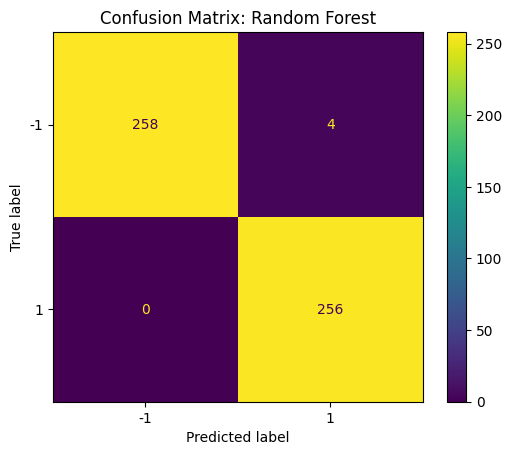

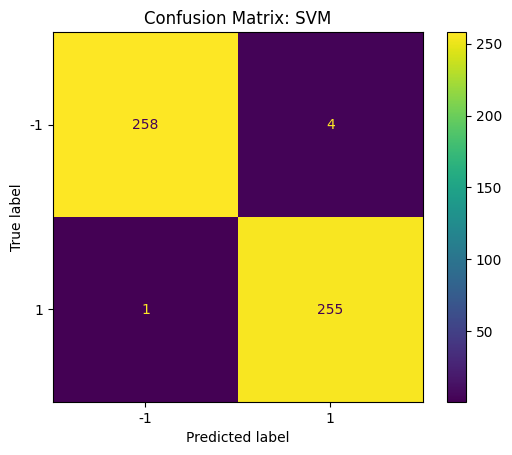

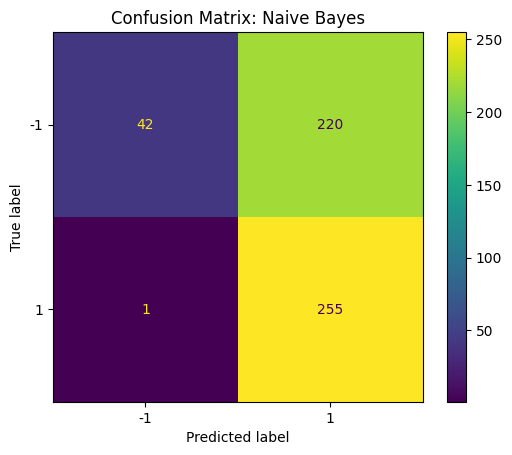

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f"Confusion Matrix: {name}")
    plt.show()
